# 🎬 Aula 1 – Python para IA com base da Netflix

**Objetivo:** Aprender Python para análise e preparação de dados com foco em IA, usando a base da Netflix.

---
## 🚨 Instruções
- Cada célula de código vem com uma explicação acima.
- Você pode executar o código e acompanhar os resultados.


## 📦 Etapa 1 – Importar bibliotecas
**Explicação:** Importamos as bibliotecas essenciais para análise de dados e gráficos. Elas são padrão no ecossistema de IA com Python.
- `pandas`: manipulação de dados
- `numpy`: vetores e arrays numéricos
- `matplotlib.pyplot` e `seaborn`: criação de gráficos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 🗃️ Etapa 2 – Carregar o dataset da Netflix
**Explicação:** Vamos carregar o dataset da Netflix diretamente de uma URL (caso esteja disponível) ou via upload manual.
- Caso não tenha o dataset, baixe de: https://www.kaggle.com/datasets/shivamb/netflix-shows
- Suba o arquivo `netflix_titles.csv` no ambiente Colab.

In [ ]:
# Carregar o arquivo CSV
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 🔍 Etapa 3 – Explorar o dataset
**Explicação:** Verificamos a estrutura dos dados com `info()` e estatísticas com `describe()`.
- `info()` mostra tipo de dados e se há valores nulos.
- `describe()` mostra estatísticas, mas só funciona com colunas numéricas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


## 🎯 Etapa 4 – Análises simples com Pandas
**Explicação:** Vamos responder perguntas com código:
- Quantas produções são filmes e quantas são séries?
- Quais os países com mais produções?
- Quais os gêneros mais comuns?

In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
df['country'].value_counts().head(10)

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [ ]:
df['listed_in'].value_counts().head(10)

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Kids' TV,220
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186


## 📊 Etapa 5 – Visualização com gráficos
**Explicação:** Vamos transformar dados em imagens para entender padrões visuais.
- Gráfico de barras para tipos de produção
- Gráfico de pizza por país
- Gráfico de séries ao longo do tempo

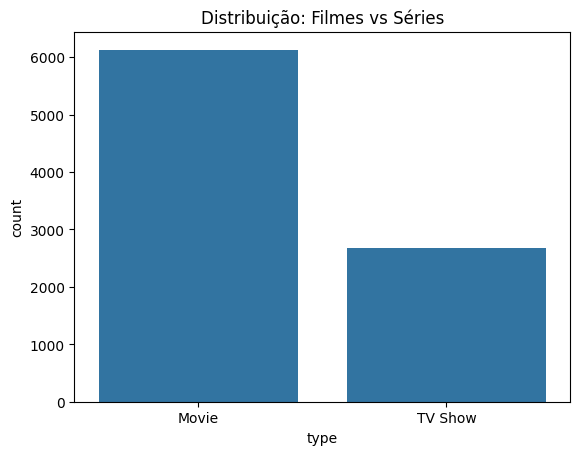

In [ ]:
sns.countplot(data=df, x='type')
plt.title('Distribuição: Filmes vs Séries')
plt.show()

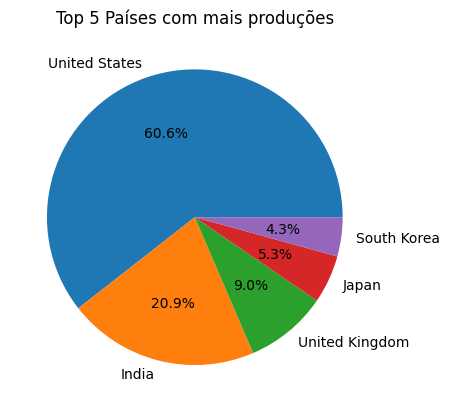

In [ ]:
df['country'].value_counts().head(5).plot.pie(autopct='%1.1f%%')
plt.title('Top 5 Países com mais produções')
plt.ylabel('')
plt.show()

# 📊 Etapa 6 – Explorando insights com visualização
**Explicação:** Agora que já sabemos manipular dados e criar gráficos, vamos extrair informações relevantes do dataset da Netflix. Abaixo estão exemplos com explicações.

## 😈 Agrupamento por década, conforme Fabio Bridi solicitou
Para fazer isso, **primeiro vamos criar uma nova coluna de decadas** e depois criar o gráfico.

**Explicação:**

*   `groupby(['decada', 'type'])` → agrupa por década e tipo (Movie ou TV Show)
*   `size()` → conta os itens
*   `unstack()` → transforma "type" em colunas
*  `plot(stacked=True)` → gráfico de barras empilhadas







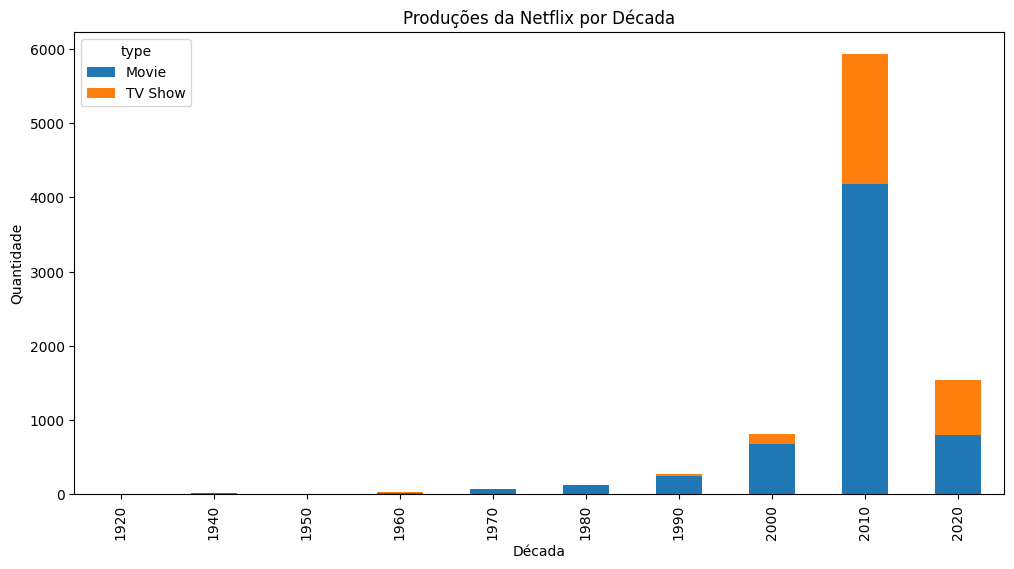

Text(0, 0.5, 'Quantidade')

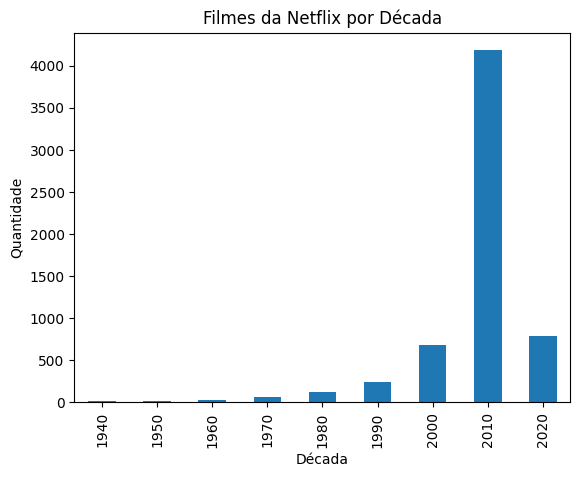

In [ ]:
df['decada'] = (df['release_year'] // 10) * 10
df.groupby(['decada', 'type']).size().unstack().plot(
    kind='bar',
    figsize=(12, 6),
    stacked=True
)

plt.title('Produções da Netflix por Década')
plt.xlabel('Década')
plt.ylabel('Quantidade')
plt.show()

#somente filmes

# df_filmes = df[df['type'] == 'Movie']
# df_filmes.groupby('decada').size().plot(kind='bar')

# plt.title('Filmes da Netflix por Década')
# plt.xlabel('Década')
# plt.ylabel('Quantidade')

## 🎞️ Quantas produções foram lançadas por ano?
Visualizar a quantidade de lançamentos ao longo dos anos ajuda a perceber o crescimento da plataforma.

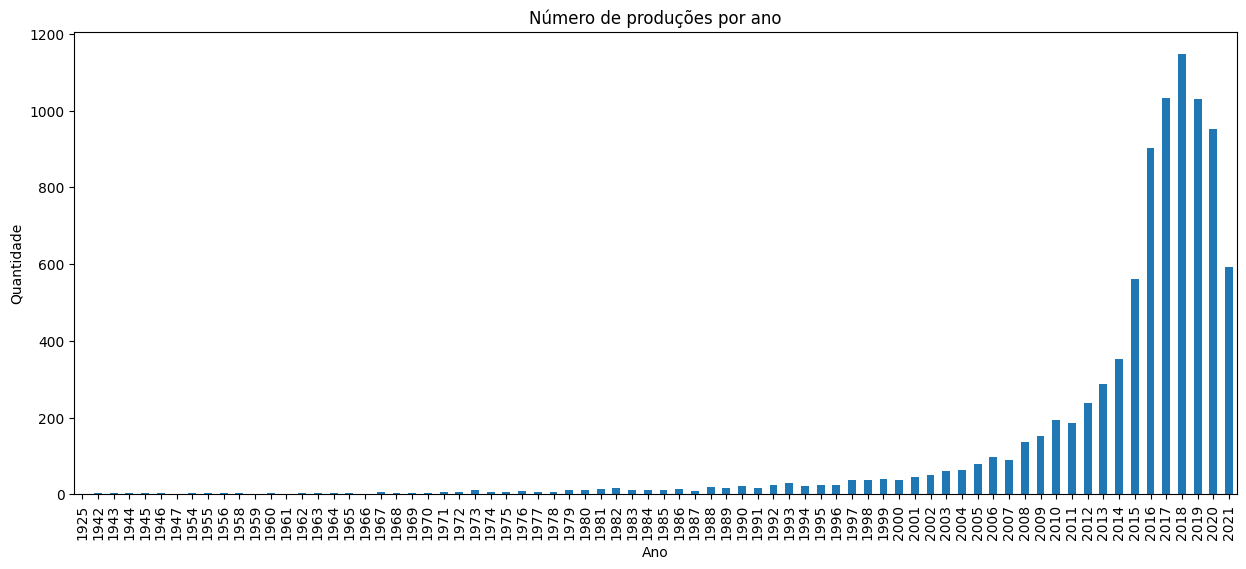

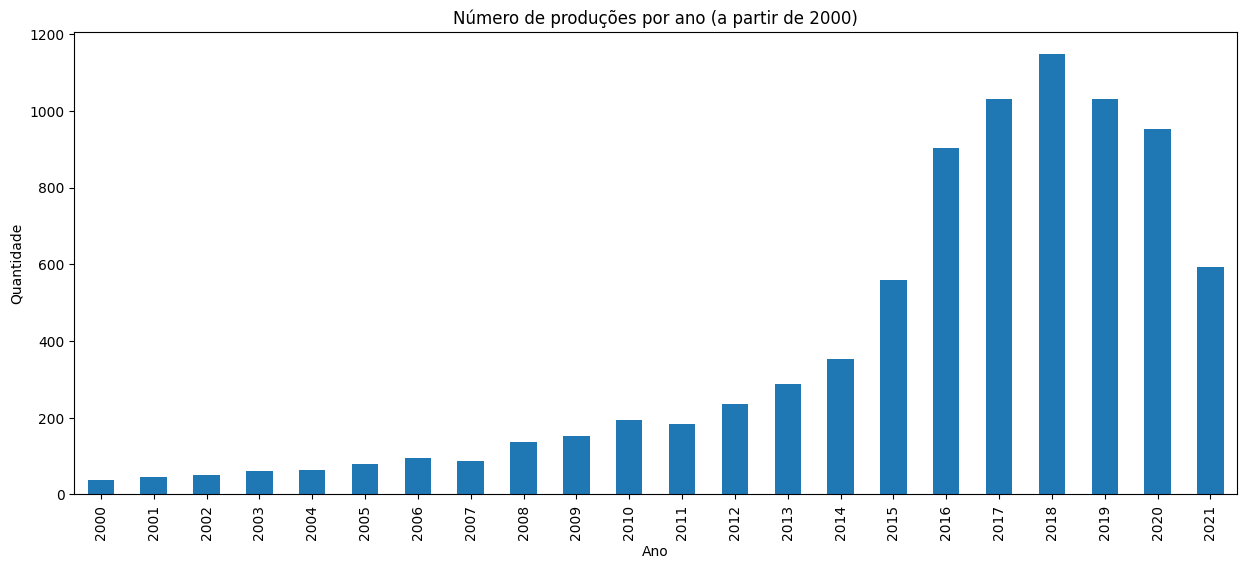

In [ ]:
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(15,6))
plt.title('Número de produções por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()

#Versão com somente anos 2000

df['release_year'].value_counts().sort_index().loc[lambda x: x.index >= 2000].plot(kind='bar', figsize=(15,6))
plt.title('Número de produções por ano (a partir de 2000)')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()

## 🎬 Comparar filmes e séries por ano
Comparamos a evolução de lançamentos de cada tipo ao longo do tempo.

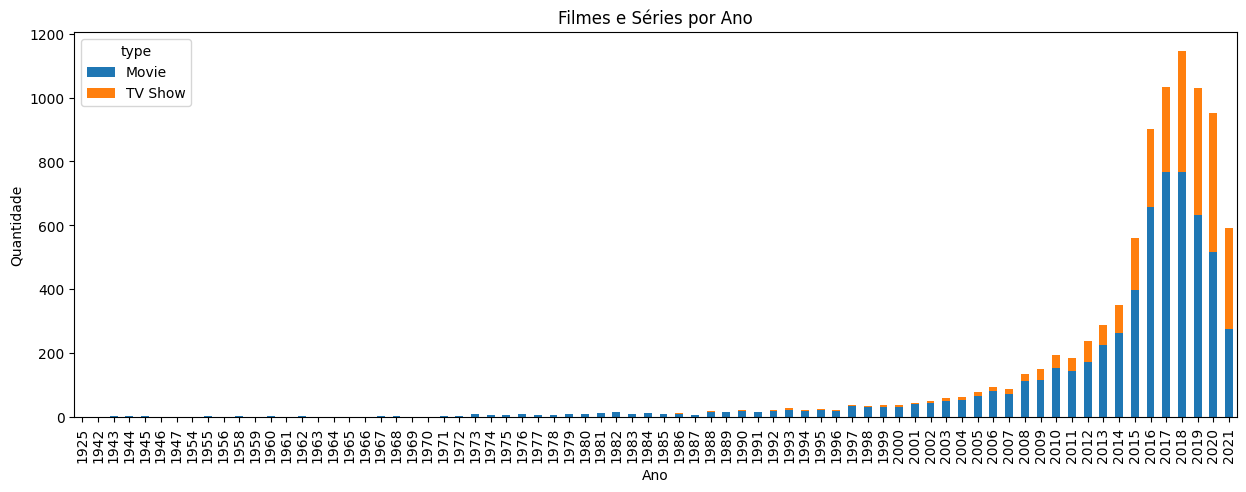

In [ ]:
df.groupby(['release_year', 'type']).size().unstack().plot(kind='bar', stacked=True, figsize=(15,5))
plt.title('Filmes e Séries por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()

## 🌍 Top 10 países com mais produções
Mostra quais países dominam o catálogo da Netflix.

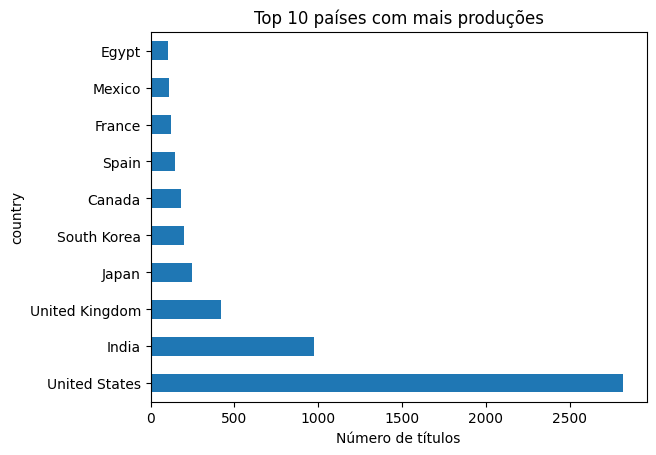

In [ ]:
df['country'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 países com mais produções')
plt.xlabel('Número de títulos')
plt.show()

## 🍿 Gêneros mais comuns (primeiro da lista)
Divide a coluna 'listed_in' e pega o primeiro gênero de cada título.

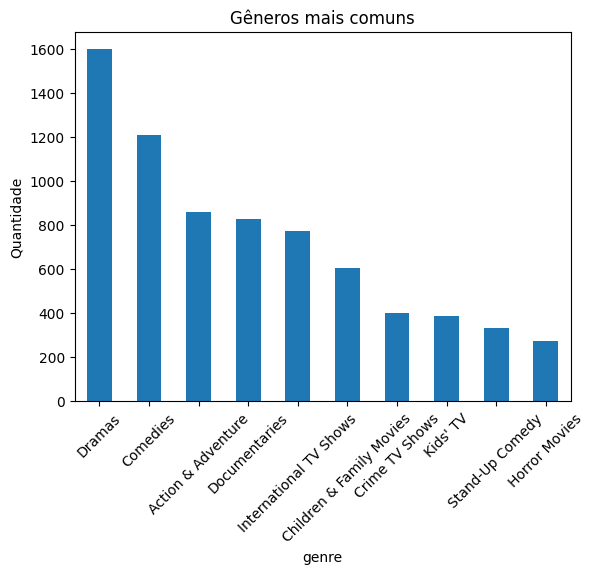

In [ ]:
df['genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])
df['genre'].value_counts().head(10).plot(kind='bar')
plt.title('Gêneros mais comuns')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

## 🕵️‍♂️ Títulos mais antigos disponíveis na Netflix
Quais são os filmes ou séries mais antigos do catálogo?

In [ ]:
df.sort_values('release_year').head(10)[['title', 'release_year']]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8660,Undercover: How to Operate Behind Enemy Lines,1943
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
8436,The Negro Soldier,1944
8640,Tunisian Victory,1944
7219,Know Your Enemy - Japan,1945


## 🔠 Ordenação de títulos
Mostrar ordenações alfabéticas crescentes e decrescentes dos títulos.

In [ ]:
df.sort_values('title').head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
2036,s2037,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",Horror Movies
2304,s2305,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,"July 1, 2020",2019,TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",Documentaries
2481,s2482,Movie,#FriendButMarried,Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,"May 21, 2020",2018,TV-G,102 min,"Dramas, International Movies, Romantic Movies","Pining for his high school crush for years, a ...",Dramas
2324,s2325,Movie,#FriendButMarried 2,Rako Prijanto,"Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,"June 28, 2020",2020,TV-G,104 min,"Dramas, International Movies, Romantic Movies",As Ayu and Ditto finally transition from best ...,Dramas
5973,s5974,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",2018,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,Comedies
5695,s5696,Movie,#Rucker50,Robert McCullough Jr.,NaN,United States,"December 1, 2016",2016,TV-PG,56 min,"Documentaries, Sports Movies",This documentary celebrates the 50th anniversa...,Documentaries
654,s655,Movie,#Selfie,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,"June 21, 2021",2014,TV-MA,125 min,"Comedies, Dramas, International Movies","Two days before their final exams, three teen ...",Comedies
655,s656,Movie,#Selfie 69,Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,"June 21, 2021",2016,TV-MA,119 min,"Comedies, Dramas, International Movies","After a painful breakup, a trio of party-lovin...",Comedies
2666,s2667,TV Show,#blackAF,NaN,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,"April 17, 2020",2020,TV-MA,1 Season,TV Comedies,Kenya Barris and his family navigate relations...,TV Comedies
5972,s5973,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,Documentaries


In [ ]:
df.sort_values('title', ascending=False).head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
7108,s7109,Movie,최강전사 미니특공대 : 영웅의 탄생,Young Jun Lee,"Um Sang-hyun, Yang Jeong-hwa, Jeon Tae-yeol, S...",NaN,"September 1, 2018",2018,TV-Y7,68 min,Children & Family Movies,"Miniforce, a special task force of elite range...",Children & Family Movies
5022,s5023,Movie,반드시 잡는다,Hong-seon Kim,Baek Yoon-sik,South Korea,"February 28, 2018",2017,TV-MA,110 min,"Dramas, International Movies, Thrillers",After people in his town start turning up dead...,Dramas
7101,s7102,TV Show,마녀사냥,NaN,"Si-kyung Sung, Se-yoon Yoo, Dong-yup Shin, Ji-...",South Korea,"February 19, 2018",2015,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Stand...",Four Korean celebrity men and guest stars of b...,International TV Shows
4914,s4915,TV Show,海的儿子,NaN,"Li Nanxing, Christopher Lee, Jesseca Liu, Appl...",NaN,"April 27, 2018",2016,TV-14,1 Season,"International TV Shows, TV Dramas","Two brothers start a new life in Singapore, wh...",International TV Shows
6177,s6178,TV Show,忍者ハットリくん,NaN,NaN,Japan,"December 23, 2018",2012,TV-Y7,2 Seasons,"Anime Series, Kids' TV","Hailing from the mountains of Iga, Kanzo Hatto...",Anime Series
4667,s4668,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",2018,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,Dramas
2998,s2999,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",2020,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...,Anime Series
5970,s5971,Movie,​Mayurakshi,Atanu Ghosh,"Soumitra Chatterjee, Prasenjit Chatterjee, Ind...",India,"September 15, 2018",2017,TV-14,100 min,"Dramas, International Movies",When a middle-aged divorcee returns to Kolkata...,Dramas
5969,s5970,Movie,​Maj Rati ​​Keteki,Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,"September 15, 2018",2017,TV-14,117 min,"Dramas, International Movies",A successful writer returns to the town that l...,Dramas
5968,s5969,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",2018,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",Action & Adventure


## 🔞 Produções por classificação indicativa
Analisar quantas produções são voltadas para cada faixa etária.

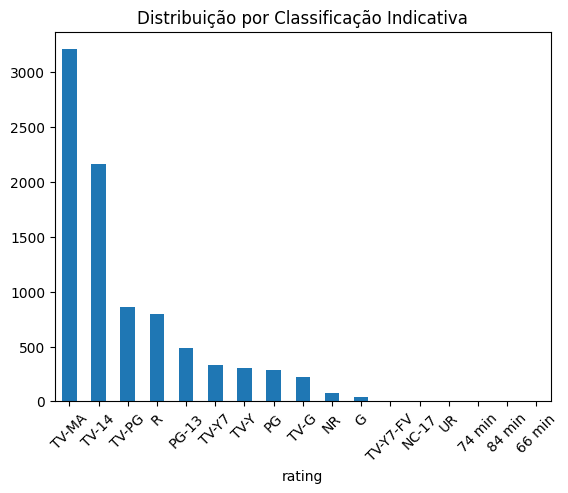

In [ ]:
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribuição por Classificação Indicativa')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_clean = df.dropna(subset=['rating', 'country'])
encoder = LabelEncoder()
df_clean['rating_encoded'] = encoder.fit_transform(df_clean['rating'])
df_clean[['rating', 'rating_encoded']].head()

<ipython-input-29-e91a4e49698a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rating_encoded'] = encoder.fit_transform(df_clean['rating'])


,rating,rating_encoded
0,PG-13,7
1,TV-MA,11
4,TV-MA,11
7,TV-MA,11
8,TV-14,9


# 🛠️ Etapa 7 – Pré-processamento para IA
**Explicação:** Preparamos dados para modelos de IA:
- Converter categorias em números (`LabelEncoder`)
- Tratar valores ausentes
- Normalizar (se necessário)